# Exercise 7.1

If buses arrive at a bus stop every 20 minutes, and you arrive at the bus stop at a random time, your wait time until the bus arrives is uniformly distributed from 0 to 20 minutes.

But in reality, there is variability in the time between buses. Suppose you are waiting for a bus, and you know the historical distribution of time between buses. Compute your distribution of wait times.

*Hint*: Suppose that the time between buses is either 5 or 10 minutes with equal probability. What is the probability that you arrive during one of the 10 minute intervals?

### Theory

$P(wait)=\sum{P(wait|interval_i)P(interval_i)}$

This is what is refered to as a mixture of distribution. Every distribution has a probability of happening. Then you can compute the probability of every wait time.

This is different than the example given in chapter 8 where they calculate the average time between buses. It's either 5 or 10 minutes each with probability 50%. That gives an average time between buses of $5*0.5 + 10*0.5=7.5$. Here we want to calculate our own wait time.

### Practice

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), 'code'))

In [32]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
from thinkbayes2 import MakeUniformPmf, MakeMixture, Pmf
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
u5 = MakeUniformPmf(0,5,6)
u10 = MakeUniformPmf(0,10,11)

In [22]:
metapmf = Pmf()
metapmf.Set(u5, 1)
metapmf.Set(u10, 1)
metapmf.Normalize()
mix = MakeMixture(metapmf)

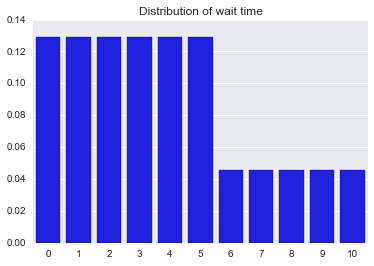

In [48]:
g = sns.barplot(x=list(range(11)), y=[mix.Prob(i) for i in range(11)], color='b')
g = g.set_title("Distribution of wait time")

In [53]:
print("On average the wait time is {} minutes for that distribution".format(mix.Mean()))

On average the wait time is 3.75 minutes for that distribution


But if you were to arrive at the bus stop, what would be the perceived average wait time? You are more likely to arrive during a 10 minutes period.

In [54]:
metapmf = Pmf()
metapmf.Set(u5, 5)
metapmf.Set(u10, 10)
metapmf.Normalize()
mix = MakeMixture(metapmf)

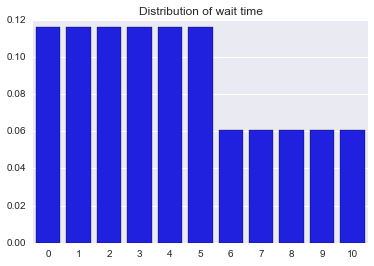

In [55]:
g = sns.barplot(x=list(range(11)), y=[mix.Prob(i) for i in range(11)], color='b')
g = g.set_title("Distribution of wait time")

In [57]:
print("On average you will wait {:.2f} minutes for that distribution at the bus station".format(mix.Mean()))

On average you will wait 4.17 minutes for that distribution at the bus station
